In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("world_happiness_report_2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [5]:
res=df['Score'].corr(df['GDP per capita'])
res

0.7938828678781273

связь линейная прямая сильная! Визуализируем:

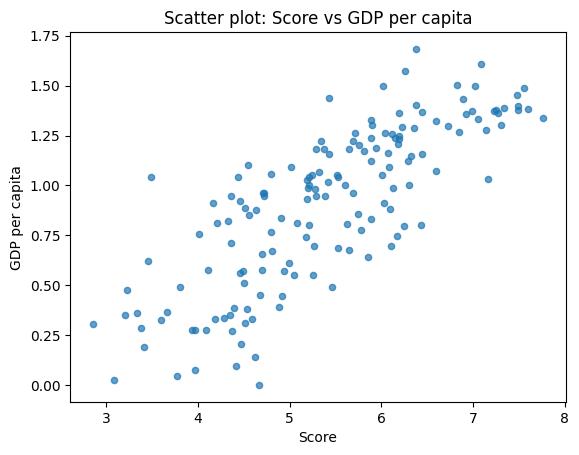

In [6]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Score', y='GDP per capita', alpha=0.7)
plt.title("Scatter plot: Score vs GDP per capita")
plt.show()

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [8]:
res=df['Score'].corr(df['Social support'],method="spearman")
res

0.8161807357057258

Связь сильная!

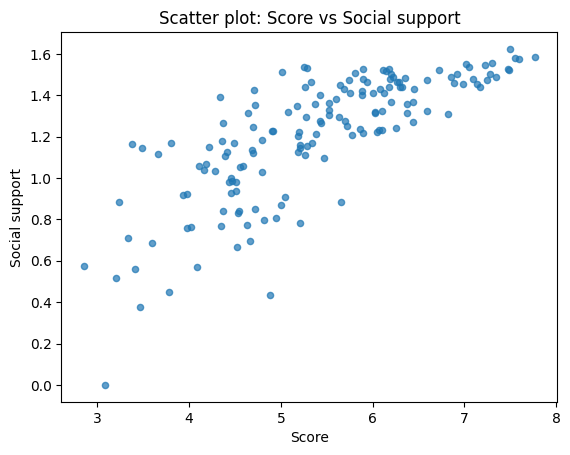

In [9]:
df.plot(kind='scatter', x='Score', y='Social support', alpha=0.7)
plt.title("Scatter plot: Score vs Social support")
plt.show()

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

In [10]:
res=df['Score'].corr(df['Healthy life expectancy'],method="kendall")
res

0.6026128531700046

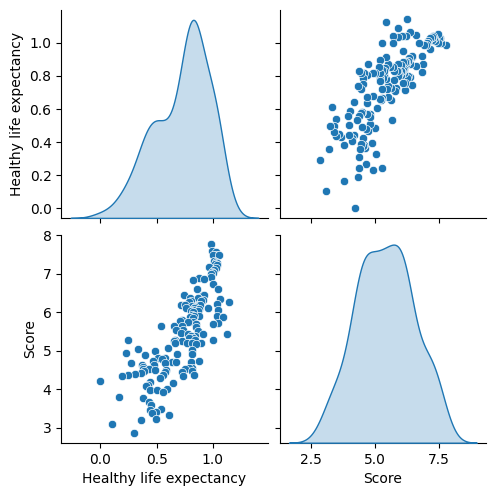

In [11]:
import seaborn as sns
sns.pairplot(df, vars=["Healthy life expectancy", "Score"], kind="scatter", diag_kind="kde")
plt.show()

Связь есть - по Кендалу она умеренно сильная! 

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [12]:
res=df['Score'].corr(df['Freedom to make life choices'])
res

0.5667418257199899

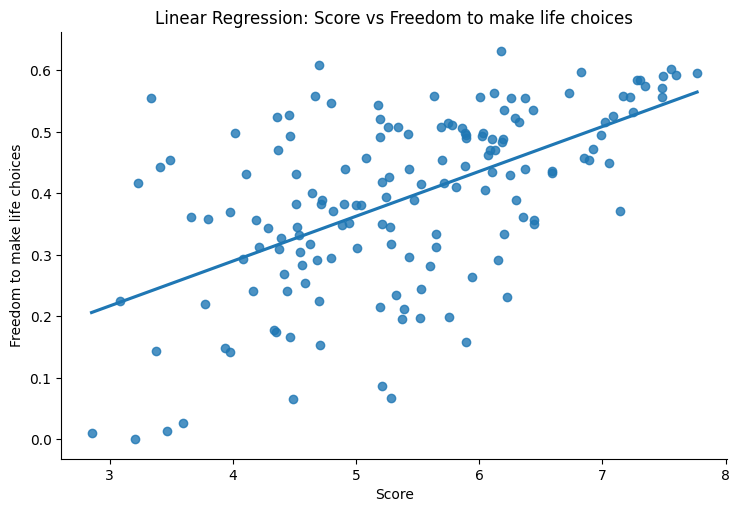

In [13]:
sns.lmplot(x="Score", y="Freedom to make life choices", data=df, aspect=1.5, ci=None)
plt.title("Linear Regression: Score vs Freedom to make life choices")
plt.show()

связь слабая!

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

<Axes: >

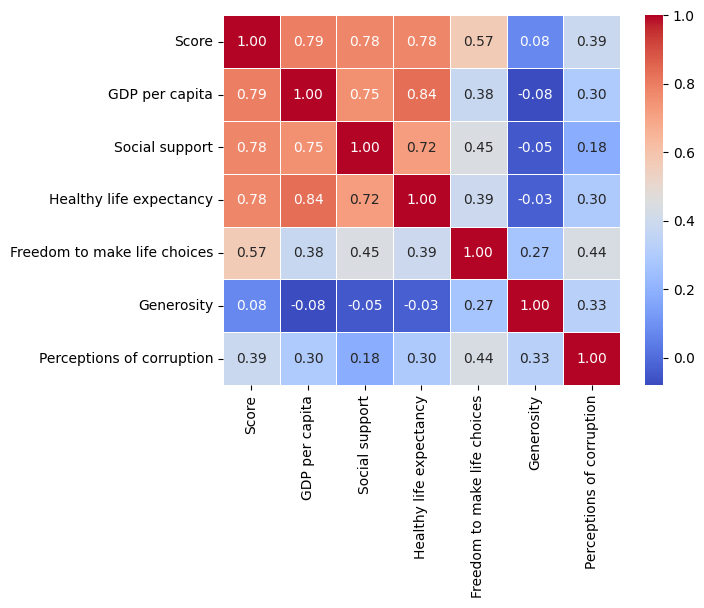

In [16]:
temp = df.select_dtypes(include=['float64'])
res=temp.corr()
sns.heatmap(res,annot=True,linewidth=0.5,fmt='.2f',cmap="coolwarm")

Как видим наиболее сильно с уровнем счастья связан уровень ВВП на душу населения! Очень близко к нему держаться соц поддержка и время здоровой жизни!